# First Steps towards Reinforcement Learning

In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import DeUberEnv
from tqdm import tqdm
tf.disable_v2_behavior()

%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
env = gym.make('fSEnv-ej3-v0')

C:\Users\whiwho\Anaconda3\envs\investigacion\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Environment '<class 'DeUberEnv.envs.DUej3Map.FSej3'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
tf.reset_default_graph()

In [4]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,25],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([25,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
updateModel = trainer.minimize(loss)

In [8]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.05
num_episodes = 8000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
ap = 0
with tf.Session() as sess:
    sess.run(init)
    for i in tqdm(range(num_episodes)):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:s})
            #print("---")
            #print(a)
            #print(allQ)
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #print(str(j) + str(a))
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:s})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:s,nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        ap+=rAll
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(ap/num_episodes))


100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [02:19<00:00, 57.50it/s]

Percent of succesful episodes: -0.156407500000012


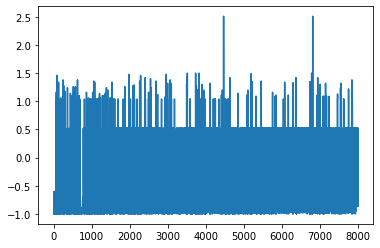

In [9]:

plt.plot(rList)

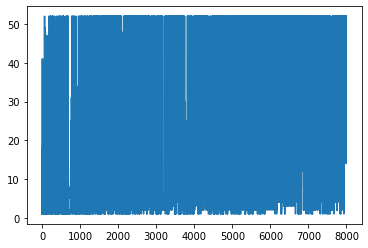

In [10]:
plt.plot(jList)